In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [17]:
df = pd.read_csv("bad_data/data_021119920_010222.csv")

In [18]:
df.head()

,full_name,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Maruti Alto Std,1.2 Lakh*,NaN,2012.0,Individual,"1,20,000 kms",First Owner,Petrol,Manual,Mileage19.7 kmpl,Engine796 CC,Max Power46.3 bhp,Seats5
1,Hyundai Grand i10 Asta,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,Seats5
2,Hyundai i20 Asta,2.15 Lakh*,NaN,2010.0,Individual,"60,000 kms",First Owner,Petrol,Manual,Mileage17.0 kmpl,Engine1197 CC,Max Power80 bhp,Seats5
3,Maruti Alto K10 2010-2014 VXI,2.26 Lakh*,NaN,2012.0,Individual,"37,000 kms",First Owner,Petrol,Manual,Mileage20.92 kmpl,Engine998 CC,Max Power67.1 bhp,Seats5
4,Ford Ecosport 2015-2021 1.5 TDCi Titanium BSIV,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,Seats5


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20026 entries, 0 to 20025
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   full_name          19980 non-null  object 
 1   selling_price      19980 non-null  object 
 2   new-price          9566 non-null   object 
 3   year               19980 non-null  float64
 4   seller_type        19980 non-null  object 
 5   km_driven          19980 non-null  object 
 6   owner_type         19980 non-null  object 
 7   fuel_type          19980 non-null  object 
 8   transmission_type  19980 non-null  object 
 9   mileage            19980 non-null  object 
 10  engine             19921 non-null  object 
 11  max_power          19921 non-null  object 
 12  seats              19853 non-null  object 
dtypes: float64(1), object(12)
memory usage: 2.0+ MB


In [20]:
df.isna().sum()

full_name               46
selling_price           46
new-price            10460
year                    46
seller_type             46
km_driven               46
owner_type              46
fuel_type               46
transmission_type       46
mileage                 46
engine                 105
max_power              105
seats                  173
dtype: int64

In [21]:
df = df.dropna()

In [22]:
def generate_brand_model(df):
    df_name = df['full_name'].str.split(' ', expand=True)
    #df['brand'] = df_name[0].str.lower()
    #df['model'] = df_name[1].str.lower()
    df['name'] = df_name[0].str.lower() + ' ' + df_name[1].str.lower()
    df = df.drop('full_name', axis=1)
    return df
    
df = generate_brand_model(df)

In [23]:
def seats(df):
    df['seats'] = df['seats'].str.split('Seats', expand=True)[1].astype(int)
    return df

df = seats(df)

In [24]:
df['transmission_type'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [25]:
df['fuel_type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'Electric'], dtype=object)

In [26]:
df['owner_type'].unique()

array(['First Owner', 'Third Owner', 'Second Owner'], dtype=object)

In [27]:
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [28]:
df.head()

,selling_price,new-price,year,seller_type,km_driven,owner_type,fuel_type,transmission_type,mileage,engine,max_power,seats,name
1,5.5 Lakh*,New Car (On-Road Price) : Rs.7.11-7.48 Lakh*,2016.0,Individual,"20,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine1197 CC,Max Power82 bhp,5,hyundai grand
4,5.7 Lakh*,New Car (On-Road Price) : Rs.10.14-13.79 Lakh*,2015.0,Dealer,"30,000 kms",First Owner,Diesel,Manual,Mileage22.77 kmpl,Engine1498 CC,Max Power98.59 bhp,5,ford ecosport
5,3.5 Lakh*,New Car (On-Road Price) : Rs.5.16-6.94 Lakh*,2013.0,Individual,"35,000 kms",First Owner,Petrol,Manual,Mileage18.9 kmpl,Engine998 CC,Max Power67.1 bhp,5,maruti wagon
6,3.15 Lakh*,New Car (On-Road Price) : Rs.6.54-6.63 Lakh*,2013.0,Dealer,"40,000 kms",First Owner,Petrol,Manual,Mileage20.36 kmpl,Engine1197 CC,Max Power78.9 bhp,5,hyundai i10
7,4.1 Lakh*,New Car (On-Road Price) : Rs.5.26-7.01 Lakh*,2018.0,Dealer,"17,512 kms",First Owner,Petrol,Manual,Mileage20.51 kmpl,Engine998 CC,Max Power67.04 bhp,5,maruti wagon


In [29]:
df = df.reset_index(drop=True)

In [33]:
from sklearn.preprocessing import OneHotEncoder
def remove_categorical_col(df):
    cat_cols = ['transmission_type', 'fuel_type', 'seller_type', 'name']
    for col in cat_cols:
        print(df.shape)
        onehotencoder = OneHotEncoder()
        X = onehotencoder.fit_transform(df[col].values.reshape(-1,1)).toarray()
        #To add this back into the original dataframe 
        dfOneHot = pd.DataFrame(X, columns = [col+"_"+str(int(i)) for i in range(X.shape[1])]) 
        df = pd.concat([df, dfOneHot], axis=1, join='inner')
    df.drop(cat_cols, inplace=True, axis=1)
    owner = {
        'First Owner': 1,
        'Second Owner': 2,
        'Third Owner': 3
    }
    
    df['owner_type'] = df['owner_type'].replace(owner)
    return df

df = remove_categorical_col(df)

(9492, 13)
(9492, 15)
(9492, 19)
(9492, 22)


In [34]:
df.shape

(9492, 138)

In [ ]:
# def remove_categorical_col(self):
#         self.data.reset_index(drop=True)
#         cat_cols = ['transmission_type', 'fuel_type', 'seller_type', 'name']
#         for col in cat_cols:
#             self.data.reset_index(drop=True)
#             print(self.data.shape)
#             onehotencoder = OneHotEncoder()
#             X = onehotencoder.fit_transform(self.data[col].values.reshape(-1,1)).toarray()
#             #To add this back into the original dataframe 
#             dfOneHot = pd.DataFrame(X, columns = [col+"_"+str(int(i)) for i in range(X.shape[1])]) 
#             self.data = pd.concat([self.data, dfOneHot], axis=1, join='inner')
            
#             pickle.dump(onehotencoder, open(f"models/OneHotEncoder_{col}.pickle", 'wb'))
            
#         owner = {
#             'First Owner': 1,
#             'Second Owner': 2,
#             'Third Owner': 3
#         }
        
#         self.data['owner_type'] = self.data['owner_type'].replace(owner)
# temp_df = 

In [151]:
df['transmission_type_1']

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
9487    1.0
9488    0.0
9489    0.0
9490    1.0
9491    1.0
Name: transmission_type_1, Length: 9492, dtype: float64

In [102]:
# cat_cols = ['transmission_type', 'fuel_type', 'seller_type', 'name']
# #for col in cat_cols:
# onehotencoder = OneHotEncoder()
# onehotencoder.fit(df['transmission_type'].values.reshape(-1,1))
# X = onehotencoder.transform(df['transmission_type'].values.reshape(-1,1)).toarray()
# print(len(X))
# #To add this back into the original dataframe 
# dfOneHot = pd.DataFrame(X, columns = ['transmission_type_'+str(int(i)) for i in range(X.shape[1])]) 
# print(dfOneHot.head())
# print(len(dfOneHot))
# print(dfOneHot.isna().sum())
# #df = pd.concat([df, dfOneHot], axis=1)
# #df.head()

9492
   transmission_type_0  transmission_type_1
0                  0.0                  1.0
1                  0.0                  1.0
2                  0.0                  1.0
3                  0.0                  1.0
4                  0.0                  1.0
9492
transmission_type_0    0
transmission_type_1    0
dtype: int64


In [41]:
df['transmission_type_1'].head()

KeyError: 'transmission_type_1'

In [35]:
def selling_price_in_lakhs(df):
    price_df = df['selling_price'].str.split(' ', expand=True).drop(1, axis=1)
    temp_df = df[price_df[0].str.contains(',')]
    temp_price_df = temp_df['selling_price'].str.split(',', expand=True).drop(1, axis=1)
    temp_price_df = temp_price_df[0].astype(int)/100
    temp_df['selling_price'] = temp_price_df
    df.drop(temp_df.index, axis=0, inplace=True)
    price_df.drop(temp_df.index, axis=0, inplace=True)
    df['selling_price'] = price_df[0].astype(float)
    df = df.append(temp_df)
    return df

df = selling_price_in_lakhs(df)    

/var/folders/wy/qz969cy10qv76q1z_c9k5zc40000gn/T/ipykernel_42504/2095783540.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['selling_price'] = temp_price_df


In [36]:
df = df.reset_index()
df.drop('index', inplace=True, axis=1)


In [37]:
def convert_km(df):
    df['km_driven'] = df['km_driven'].str.split(' ', expand=True).drop(1, axis=1)[0]
    df['km_driven'] = df['km_driven'].replace('[\,]', '', regex=True).astype(float)/1000
    return df

df = convert_km(df)

In [38]:
def convert_mileage(df):
    df['mileage'] = df['mileage'].str.split(' ', expand=True)[0].str.split('Mileage', expand=True)[1].astype(float)
    return df

df = convert_mileage(df)

In [39]:
def convert_max_power(df):
    df['max_power'] = df['max_power'].str.split(' ', expand=True)[1].str.split('Power', expand=True)[1]
    drop_row = df[df['max_power'] == 'null'].index
    df = df.drop(drop_row, axis=0)
    df['max_power'] = df['max_power'].astype(float)
    return df

df = convert_max_power(df)

In [40]:
def convert_engine(df):
    df['engine'] = df['engine'].str.split(' ', expand=True)[0].str.split('Engine', expand=True)[1]
    drop_row = df[df['engine'] == ''].index
    df.drop(drop_row, axis=0, inplace=True)
    df['engine'] = df['engine'].astype(int)
    return df

df = convert_engine(df)

In [41]:
def convert_new_price(df):
    df.drop(df[df['new-price'].str.endswith('Cr*')].index, axis=0, inplace=True)
    new_price_df = df['new-price'].str.split(' ', expand=True)[5].str.split('.', expand=True)
    temp_df = df[new_price_df[3].isna()]
    temp_df['new-price'] = new_price_df[new_price_df[3].isna()][1] + new_price_df[new_price_df[3].isna()][2]
    temp_df['new-price'] = temp_df['new-price'].astype(float)/100
    
    drop_row = new_price_df[new_price_df[3].isna()].index
    df.drop(drop_row, axis=0, inplace=True)
    new_price_df.drop(drop_row, axis=0, inplace=True)
    
    temp_new_price_df = new_price_df[2].str.split('-', expand=True)
    df['new-price'] = ((new_price_df[1] + temp_new_price_df[0]).astype(float) +  (temp_new_price_df[1] + new_price_df[3]).astype(float))/200
    df = df.append(temp_df)
    
    df = df.reset_index()
    df.drop('index', inplace=True, axis=1)
    
    return df

df = convert_new_price(df)

/var/folders/wy/qz969cy10qv76q1z_c9k5zc40000gn/T/ipykernel_42504/3340819677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['new-price'] = new_price_df[new_price_df[3].isna()][1] + new_price_df[new_price_df[3].isna()][2]
/var/folders/wy/qz969cy10qv76q1z_c9k5zc40000gn/T/ipykernel_42504/3340819677.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_df['new-price'] = temp_df['new-price'].astype(float)/100


In [42]:
def findYearsOld(df):
    df['yearsOld'] = 2022-df['year']
    df.drop('year', inplace=True, axis=1)
    return df

df = findYearsOld(df)

In [43]:
df.head()

,selling_price,new-price,km_driven,owner_type,mileage,engine,max_power,seats,transmission_type_0,transmission_type_1,...,name_111,name_112,name_113,name_114,name_115,name_116,name_117,name_118,name_119,yearsOld
0,5.50,7.295,20.000,1,18.90,1197,82.00,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
1,5.70,11.965,30.000,1,22.77,1498,98.59,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
2,3.50,6.050,35.000,1,18.90,998,67.10,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
3,3.15,6.585,40.000,1,20.36,1197,78.90,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
4,4.10,6.135,17.512,1,20.51,998,67.04,5,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0


# Train-test split

In [44]:
df['selling_price_cat'] = pd.cut(df['selling_price'],
                                bins=[0, 10, 20, 30, 40, 50, 60, np.inf],
                                labels=[1, 2, 3, 4, 5, 6, 7])

<AxesSubplot:>

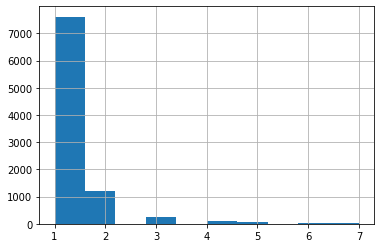

In [45]:
df['selling_price_cat'].hist()

In [46]:
# Split train and test dataset based on distribution of target variable
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['selling_price_cat']):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]

<AxesSubplot:>

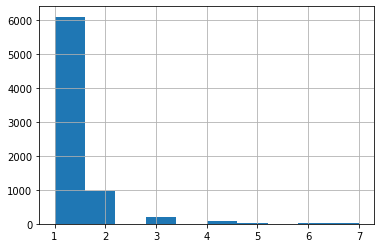

In [47]:
# Visualize the selection of Test data based on distribution of selling_price
train_set['selling_price_cat'].hist()

<AxesSubplot:>

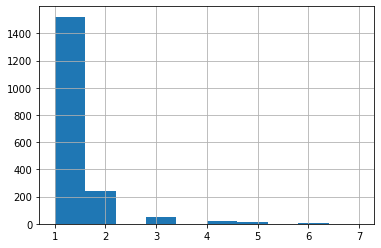

In [48]:
# Visualize the selection of Test data based on distribution of selling_price
test_set['selling_price_cat'].hist()

In [49]:
# Now, remove the selling_price_cat
for set_ in (train_set, test_set):
    set_.drop("selling_price_cat", axis=1, inplace=True)

## Find and remove duplicate rows 

In [46]:
# Find the duplicate rows
columns = list(train_set.columns)
columns.remove('new-price')
train_set_duplicated = train_set[train_set.duplicated(columns)]

# Drop the duplicate rows
train_set.drop(train_set_duplicated.index, axis=0, inplace=True)

In [50]:
train_set.to_csv('../data/train.csv', index=False)
test_set.to_csv('../data/test.csv', index=False)

# Train Data Visualization

In [73]:
X_train = train_set.drop('selling_price', axis=1)
y_train = train_set['selling_price']

X_test = test_set.drop('selling_price', axis=1)
y_test = test_set['selling_price']

<AxesSubplot:xlabel='new-price', ylabel='selling_price'>

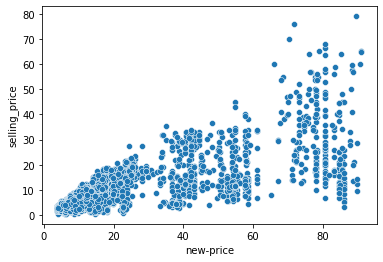

In [74]:
sns.scatterplot(data=train_set, x=X_train['new-price'], y=y_train)

<AxesSubplot:>

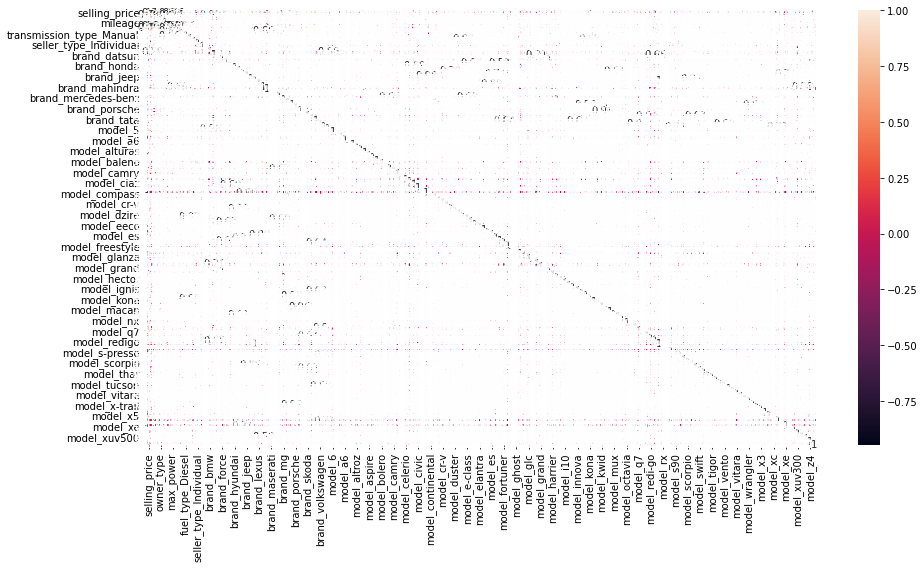

In [75]:
corr = train_set.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True)

<AxesSubplot:xlabel='deductionPercentage', ylabel='yearsOld'>

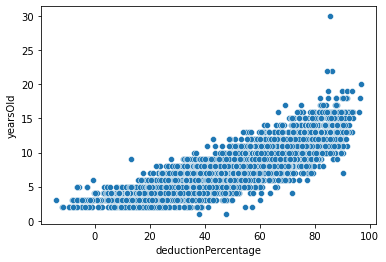

In [76]:
train_set['deductionPercentage'] = 100-(train_set['selling_price']*100)/train_set['new-price']
sns.scatterplot(data=train_set, x="deductionPercentage", y="yearsOld")

<AxesSubplot:xlabel='max_power', ylabel='selling_price'>

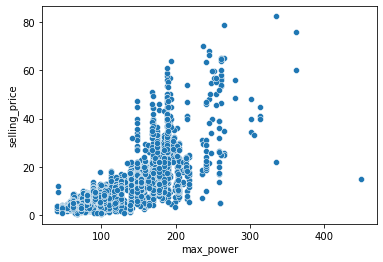

In [77]:
sns.scatterplot(data=df, x="max_power", y="selling_price")

In [ ]:
sns.pairplot(train_set)

In [ ]:
plt.hist(train_set['seats'])

In [ ]:
plt.hist(train_set['yearsOld'])

## Feature Scaling 

## Custom Transformers 

## Transformation Pipelines 

In [ ]:
# Column wise custom transformers

In [ ]:
# feature Scaling and hyper parameter tuning with the help of custom transformers